# Data Acquisition
Data on crimes committed in Chicago were made readily available by the local city government (https://data.cityofchicago.org/) and the weather data gathered here was powered by Dark Sky https://darksky.net/poweredby/.

In [1]:
import requests as r
import time
import pandas as pd

#The format of a request looks like this.
request_url = 'https://api.darksky.net/forecast/[access_key]/[latitude],[longitude],[date]'

#NOTE: one must create an account with Dark Sky in order to receive an access key

In [ ]:
#I am setting up an empty list to dump weather info into
data = []

#Let's say we wanted to gather daily temperatures from Jan/2010 to Christmas the following year
df = pd.DataFrame(pd.date_range(start='2010-01-01', end='2011-12-25', freq='D'), columns = ['Date'])

#Keep in mind that this loop will rest for 2 seconds in between every iteration (i.e. run_time = 725 * 2s)
count = 0
for date in df['Date']:
    request_url = 'https://api.darksky.net/forecast/[access_key]/41.8781,-87.6298,'
    results = r.get(request_url + date)
    data.append({})
    #Let's print something out so that we can track our progress since this loop will take so long
    print('Max temp on ' , date , ' was ' , results.json()['daily']['data'][0]['apparentTemperatureMax'])
    #If we would like to gather additional data then we would simply include additional code in the below line. Pandas will take care of formatting in the following cell
    data[count][date] = [results.json()['daily']['data'][0]['apparentTemperatureMax']], #Optional: more weather data...
    count += 1
    time.sleep(2)

In [ ]:
#Now that we have our weather data, let's throw it into a dataframe and let pandas do its thing

count = 0
for vals in data:
    if count == 0:
        df_weather_t = pd.DataFrame(vals).transpose()
        count += 1
    else:
        #Now we are simply concatenating a dataframe onto another one over and over again
        df_add = pd.DataFrame(vals).transpose()
        df_weather_t = pd.concat([df_weather_t, df_add])
        
#Now df_weather_t is a clean table with every recorded temperature over a two year span

# Data Transformation: Crime Data

In [2]:
#One can download this csv directly from https://data.cityofchicago.org/. Once that is done, let's read it into a dataframe and take a peak
df = pd.read_csv('datasets/crimes/Crimes_-_2001_to_present (1).csv')
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
394568,10558849,HZ305631,06/13/2016 01:06:00 PM,067XX S ARTESIAN AVE,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,True,False,...,15.0,66.0,04B,1161202.0,1859906.0,2016,04/10/2017 03:48:51 PM,41.771262,-87.684646,"(41.771262, -87.684646)"
394569,10709523,HZ466758,10/08/2016 07:28:00 PM,021XX W DEVON AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,50.0,2.0,04B,1160678.0,1942466.0,2016,04/11/2017 03:53:23 PM,41.997825,-87.684278,"(41.997825, -87.684278)"
394570,10831537,JA132983,01/28/2017 10:07:00 AM,035XX W 13TH PL,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,STREET,True,False,...,24.0,29.0,08B,1152938.0,1893675.0,2017,04/11/2017 03:53:23 PM,41.864096,-87.714047,"(41.864096, -87.714047)"
394571,10838883,JA141391,02/04/2017 11:45:00 AM,026XX N MILWAUKEE AVE,0483,BATTERY,AGG PRO.EMP: OTHER DANG WEAPON,CTA PLATFORM,True,False,...,35.0,22.0,04B,1154441.0,1917479.0,2017,04/11/2017 03:53:23 PM,41.929386,-87.707892,"(41.929386, -87.707892)"
394572,9914115,HY103319,01/03/2015 10:40:00 PM,011XX N HAMLIN AVE,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,STREET,True,False,...,27.0,23.0,08B,1150836.0,1907431.0,2015,04/11/2017 03:53:23 PM,41.901885,-87.721403,"(41.901885, -87.721403)"


In [3]:
#Let's stay organized and index these with the help of datetime
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x, format = '%m/%d/%Y %I:%M:%S %p'))
df.sort_values(by = 'Date', inplace = True)
df.set_index('Date', inplace = True)
df.tail()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-28 22:30:00,10866070,JA170714,0000X W TERMINAL ST,0460,BATTERY,SIMPLE,AIRPORT TERMINAL UPPER LEVEL - SECURE AREA,False,False,1652,...,41.0,76.0,08B,1100726.0,1934289.0,2017,03/07/2017 03:54:38 PM,41.976421,-87.904976,"(41.976421, -87.904976)"
2017-02-28 22:40:00,10864293,JA170691,036XX W POLK ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1133,...,24.0,27.0,08B,1152226.0,1896123.0,2017,03/07/2017 03:54:38 PM,41.870828,-87.716596,"(41.870828, -87.716596)"
2017-02-28 23:01:00,10864288,JA170697,065XX N GREENVIEW AVE,0460,BATTERY,SIMPLE,STREET,True,False,2432,...,40.0,1.0,08B,1165089.0,1943443.0,2017,03/07/2017 03:54:38 PM,42.000413,-87.668023,"(42.000413, -87.668023)"
2017-02-28 23:10:00,10864316,JA170699,059XX S CALUMET AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,ALLEY,False,True,232,...,20.0,40.0,08B,1179496.0,1865781.0,2017,03/07/2017 03:54:38 PM,41.786986,-87.617407,"(41.786986, -87.617407)"
2017-02-28 23:30:00,10864329,JA170706,001XX N LARAMIE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1532,...,28.0,25.0,08B,1141685.0,1900694.0,2017,03/07/2017 03:54:38 PM,41.883572,-87.755183,"(41.883572, -87.755183)"


A quick note on why the data was segmented by Ward instead of Beat or Community Area. The goal of this project was to assist policing strategies and to foresee large upticks in violent crime before they occurred. Ward lended itself as a valid geography to segment by because it was both specific enough for police chiefs to implement changes quickly and large enough to draw valid conclusions from (versus a body of noisey data as would have been the case if we segmented by Beat).

Another thing worth noting here is the legitimacy of our data. We know that inevitably, repeat submissions were submitted (i.e. the same crime was logged twice) because multiple criminals could have been involved in one crime or a clerical error could have occurred over the lifetime of a case. The reader should be aware that we are working under the assumption that on a macro scale, this data is clean enough to draw conclusions from despite the fact that a number of crimes way be innaccurate.

In [4]:
df = df.groupby([pd.TimeGrouper('D'), 'Ward'])['Case Number'].nunique().reset_index()
df.columns = ['Date', 'Ward', 'BatCount']
df.head()

,Date,Ward,BatCount
0,2010-01-01,1.0,3
1,2010-01-01,2.0,13
2,2010-01-01,3.0,6
3,2010-01-01,4.0,4
4,2010-01-01,5.0,3


In [5]:
#Okay. We are one step closer but we should organize this in the format that makes pandas most useful to us
import numpy as np

#We made an empty matrix indexed by date and each column was its own Ward
i_index = df['Date'].unique()
i = len(i_index)

j_index = df['Ward'].unique()
j = len(j_index)
df_matrix = np.zeros((i,j))
df_matrix.shape

(2616, 50)

In [6]:
#Looks good because our data spans from Jan/2010 to Mar/2017

#But before we start filling our matrix, we should safeguard against days on which zero batteries occurred
all_zeroes = pd.DataFrame([0 for x in range(df_matrix.shape[0])], 
                          columns=['Empty'],
                          index=pd.DatetimeIndex(start='2010-01-01', end='2017-02-28', freq='D'))

#Now we will avoid skipping any days (which could have caused headaches down the road)
for j, ward in enumerate(j_index):
    ward_df = df.copy()[(df['Ward'] == ward)].set_index('Date')
    ward_df = all_zeroes.join(ward_df['BatCount'])
    ward_df = ward_df['BatCount'].fillna(0)
    df_matrix[:, j] = ward_df

In [7]:
#Let's see if everything worked out
y = pd.DataFrame(df_matrix, index = pd.DatetimeIndex(start='2010-01-01', end='2017-02-28', freq='D'), columns = [int(x) for x in j_index])
y.head()

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,11
2010-01-01,3.0,13.0,6.0,4.0,3.0,7.0,6.0,3.0,6.0,2.0,...,15.0,6.0,5.0,2.0,3.0,4.0,1.0,3.0,5.0,0.0
2010-01-02,0.0,4.0,0.0,0.0,2.0,3.0,4.0,4.0,4.0,1.0,...,1.0,0.0,3.0,0.0,4.0,0.0,2.0,2.0,2.0,0.0
2010-01-03,1.0,0.0,4.0,1.0,3.0,5.0,2.0,3.0,2.0,2.0,...,2.0,2.0,1.0,3.0,3.0,2.0,0.0,2.0,0.0,0.0
2010-01-04,3.0,5.0,2.0,1.0,3.0,5.0,4.0,4.0,3.0,5.0,...,0.0,0.0,1.0,3.0,1.0,0.0,1.0,5.0,3.0,1.0
2010-01-05,0.0,3.0,5.0,4.0,2.0,1.0,4.0,3.0,7.0,0.0,...,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0


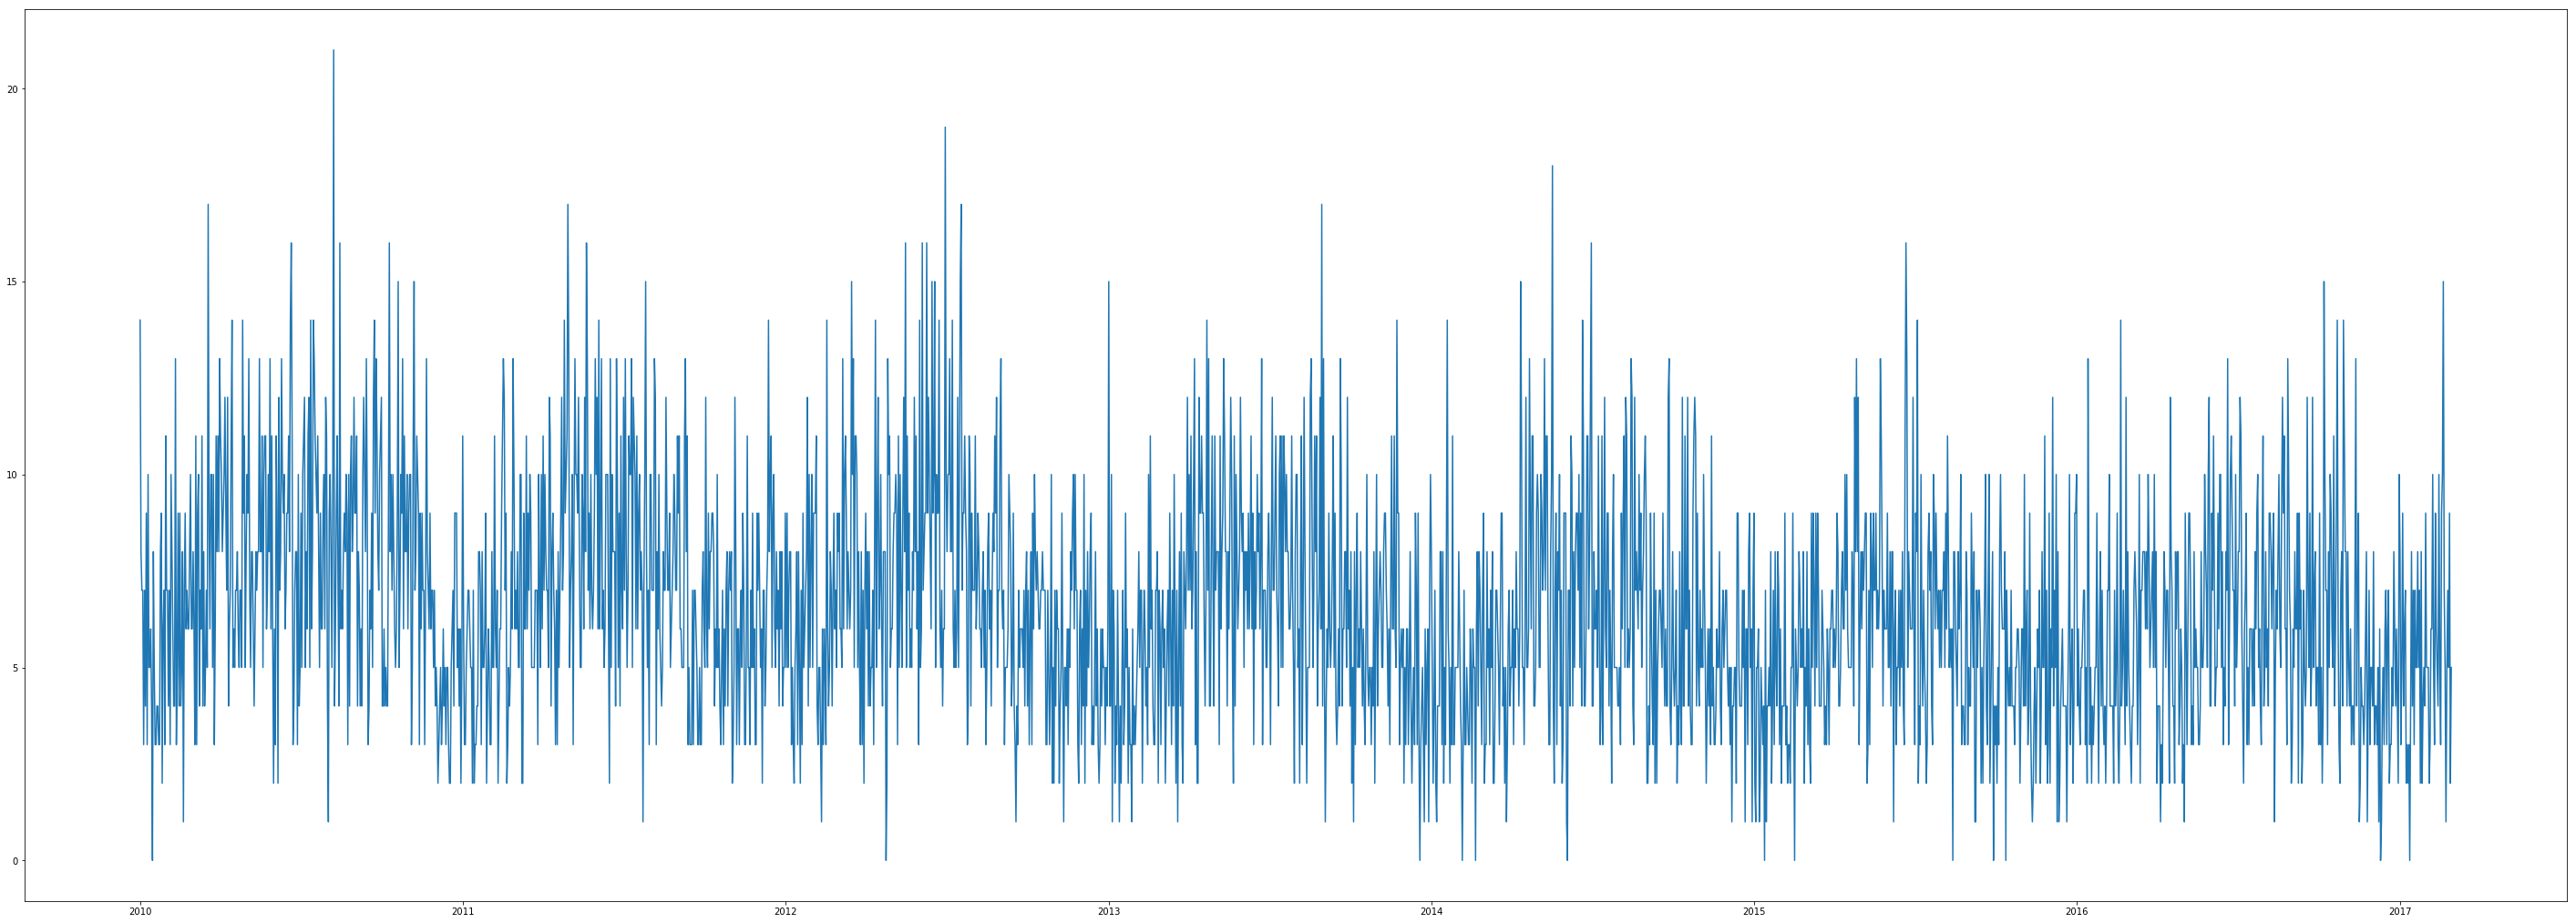

In [34]:
#Okay so let's take a look at Ward 17 over time to try and get a feel for any trends or seasonality
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (50,18))
plt.plot(y[17])

# Modeling: Time Series

In [35]:
#So there is some noise but for the most part we can see what is going on here. Upward trends in the summer time are followed by downward trends in winter
from statsmodels.tsa.stattools import adfuller

#This graph is leading us to believe that we don't have much of an overall trend but let's put some hard numbers behind that assumption.
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    plt.figure(figsize = (70, 20))
    orig = plt.plot(timeseries, color='blue',label='Original', linewidth = .1)
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/Users/kenlitton/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/kenlitton/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


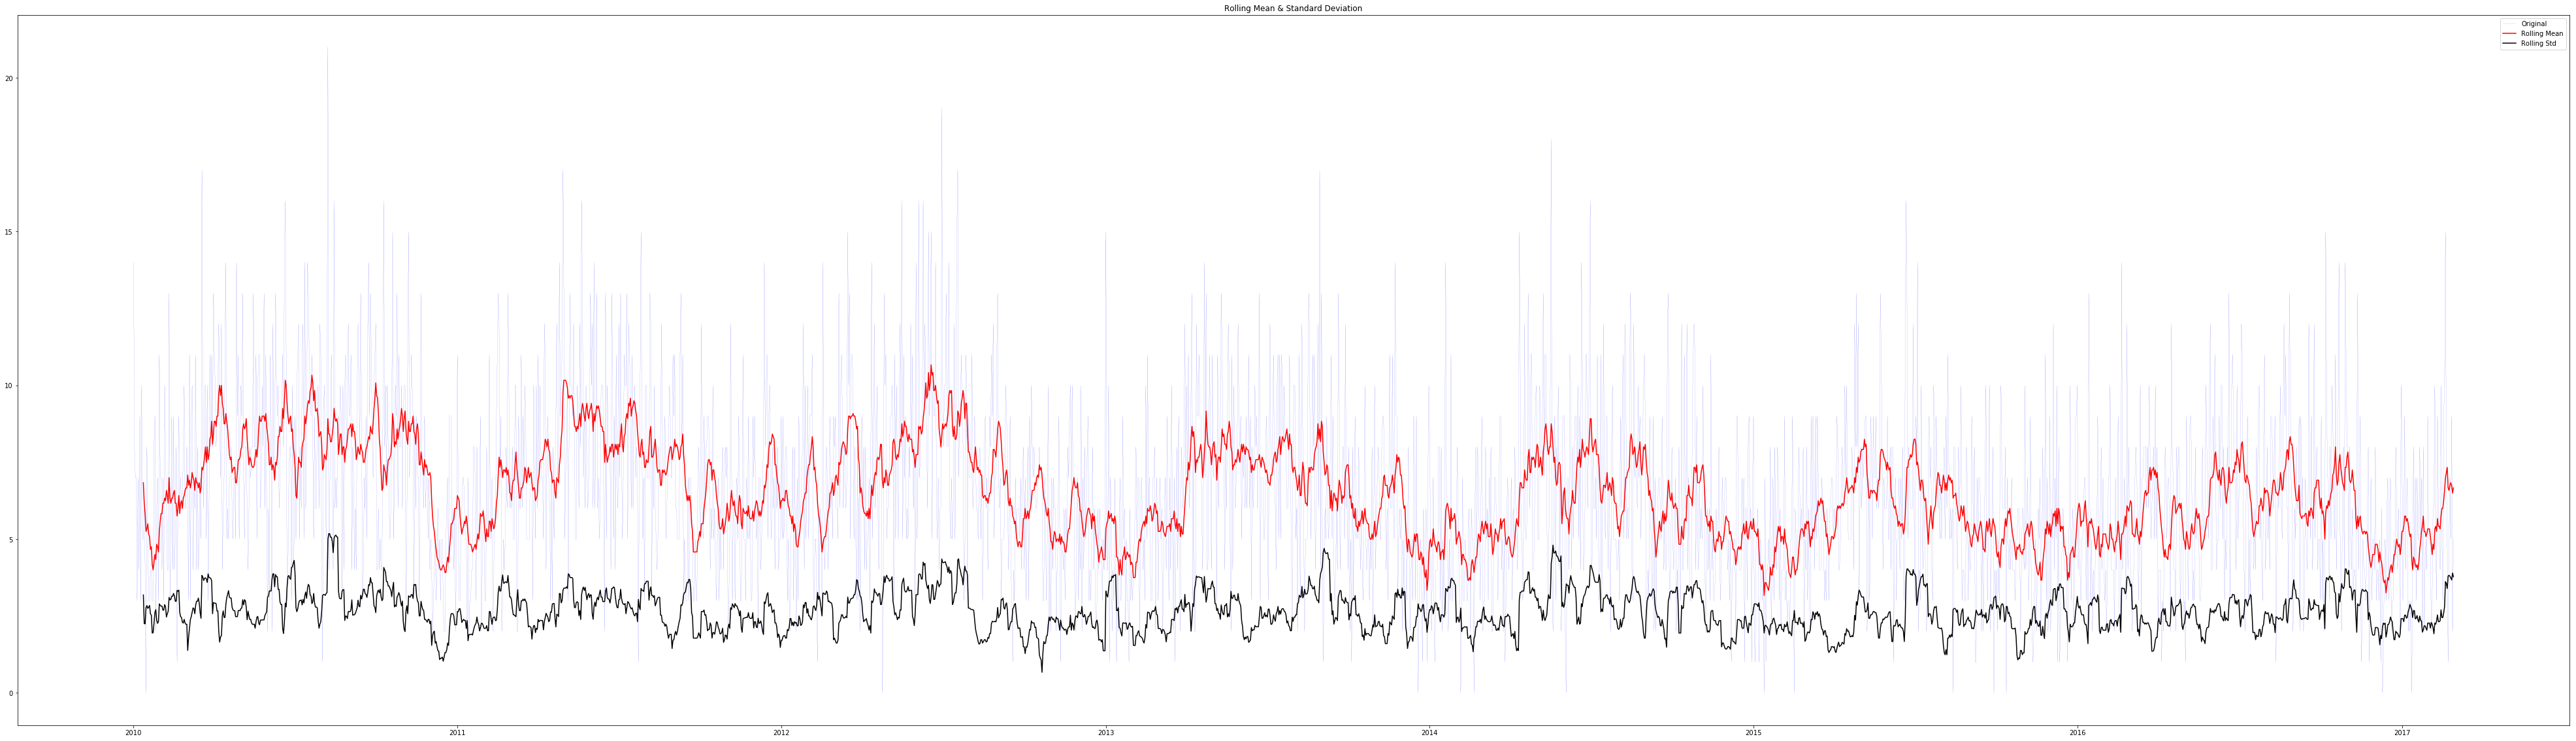

Results of Dickey-Fuller Test:
Test Statistic                   -4.458627
p-value                           0.000233
#Lags Used                       28.000000
Number of Observations Used    2587.000000
Critical Value (1%)              -3.432880
Critical Value (10%)             -2.567365
Critical Value (5%)              -2.862658
dtype: float64


In [36]:
test_stationarity(y[17])

This is very helpful. Our moving average (graphed in red) makes the seasonality much easier to see and with the help of the Dickey-Fuller Test, we have more confidence in the stationarity of our time series. Specifically, since our 'Test Statistic' is more negative than our 1% Critical Value, we can say with 99% confidence that this data is stationary. 

So now we should explore which parameters will be best to use in our time series model.

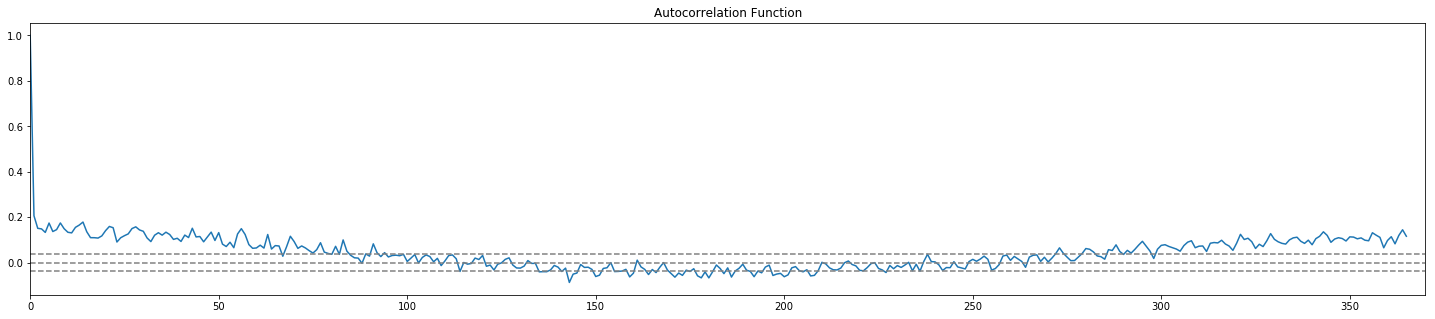

In [42]:
#ACF (auto-correlation) and PACF (partial auto-correlation) graphs help us to narrow down our decisions
from statsmodels.tsa.stattools import acf, pacf

#Let's look at a year's worth of lags in both cases
lag_acf = acf(y[17], nlags=365)
lag_pacf = pacf(y[17], nlags=365, method='ols')

#ACF will let us know whether or not we have significant correlation or if crime is randomly distributed over time
plt.figure(figsize = (25,5))
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(y[17].shape[0]),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(y[17].shape[0]),linestyle='--',color='gray')
plt.xlim(0, 370)
plt.title('Autocorrelation Function')

So what are we looking at here? 

This is simply a graph of the coefficients of correlation between a time series and lags of itself. We can clearly see a high degree of correlation because these coefficients of correaltion fall outside of our significance range well into lags > 60 and so we can say confidently that this data is not random.  

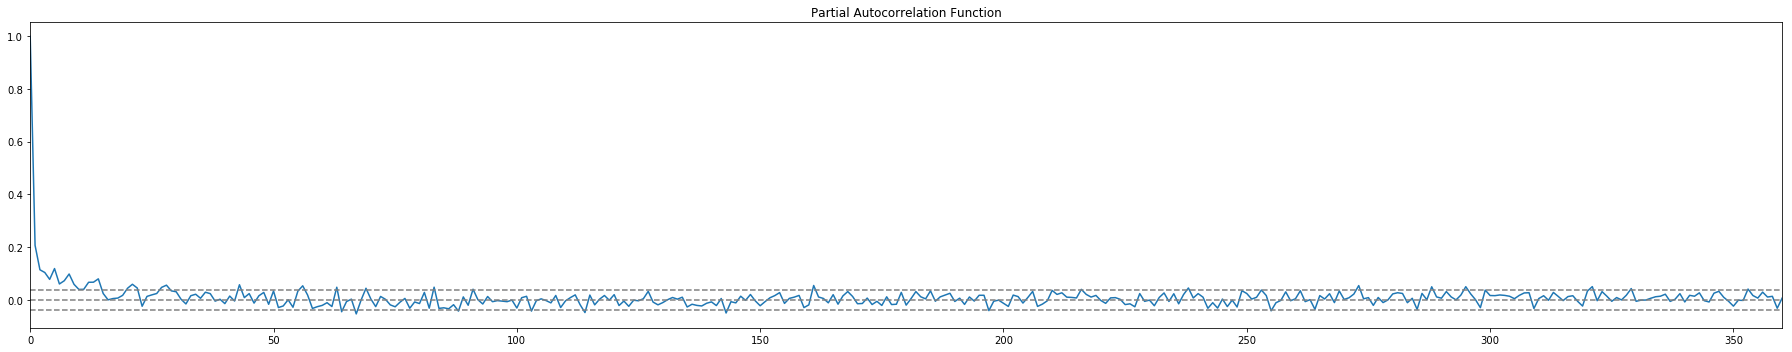

In [40]:
#PACF will let us know which AR terms to test in our model
plt.figure(figsize = (25, 5))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(y[17].shape[0]),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(y[17].shape[0]),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlim(0, 360)
plt.tight_layout()

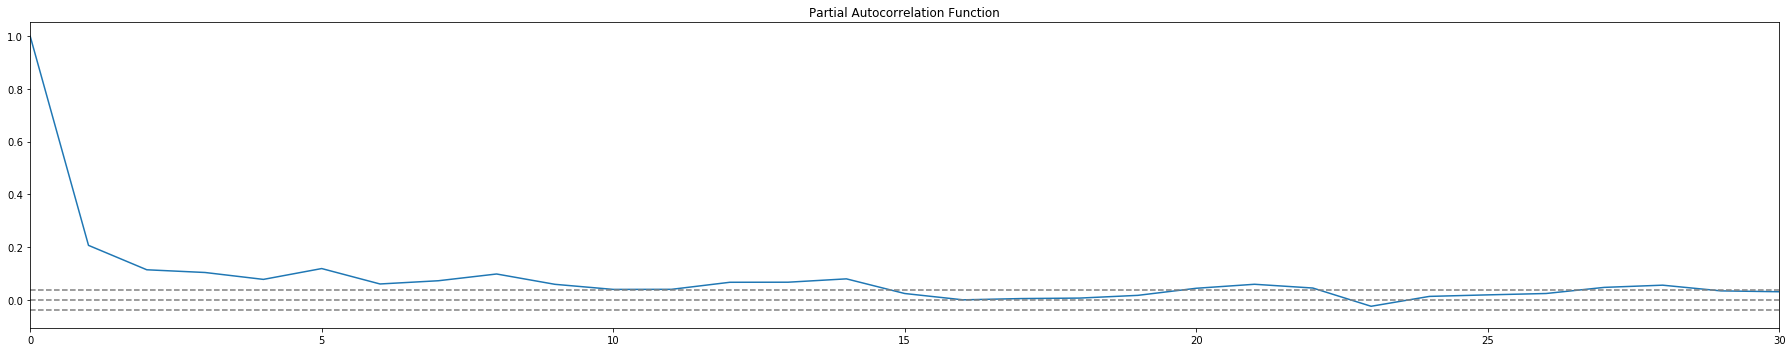

In [43]:
#Tough to read so I want to zoom in on the first 30 days
plt.figure(figsize = (25, 5))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(y[17].shape[0]),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(y[17].shape[0]),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlim(0, 30)
plt.tight_layout()

So what are we looking at here? 

Partial autocorrelation graphs display the amount of correlation between a variable and a lag of itself that is NOT EXPLAINED by correlations at all lower-order-lags.* When we analyze ACF, our coefficients of correlation often bleed into each other. Said differenty, if Yt is correlated with Yt-1, and Yt-1 is equally correlated with Yt-2, then we should also expect to find correlation between Yt and Yt-2 and this correlation goes further and further back into our Y values. PACF is such a useful tool because it removes that back propagation of correlation so that we can intelligently choose AR terms worth testing. 

But how do we choose? 

If the partial autocorrelation is significant at lag k and not significant at any higher order lags (i.e., if the PACF "cuts off" at lag k) then this suggests that we should try fitting an autoregressive model of order k.* We don't have the luxury of this 'cut-off' but we do see a number of parameters worth testing (1, 2, 5, 7 and 14 stand out as ideal candidates). 

*https://people.duke.edu/~rnau/411arim3.htm#plots

In [ ]:
import statsmodels.api as sm  
import itertools
import warnings
p = [1, 2, 5, 7, 14]
#d and q are set to 1 because of experiments we previously ran (not shown here) indicated these were the two most robust parameters
d = [1]
q = [1]

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets. S is set to 12 because of the inherent annual seasonality of crime we talked about earlier
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages because who needs those
aic_list_params = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y[17], order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            aic_list_params.append([param, param_seasonal, results.aic])
            #AIC is the metric that we use to compare parameters against each other. 
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:12744.582594710551
ARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:12697.143584997935
ARIMA(1, 1, 1)x(5, 1, 1, 12) - AIC:12519.457193832623
ARIMA(1, 1, 1)x(7, 1, 1, 12) - AIC:12393.783588031165
ARIMA(1, 1, 1)x(14, 1, 1, 12) - AIC:12063.972004964926
ARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:12746.562467471049
ARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:12693.933721902495
ARIMA(2, 1, 1)x(5, 1, 1, 12) - AIC:12516.671451003112
ARIMA(2, 1, 1)x(7, 1, 1, 12) - AIC:12388.193336070557
ARIMA(2, 1, 1)x(14, 1, 1, 12) - AIC:12057.786324742146
ARIMA(5, 1, 1)x(1, 1, 1, 12) - AIC:12733.814486411236
ARIMA(5, 1, 1)x(2, 1, 1, 12) - AIC:12672.76871233749
ARIMA(5, 1, 1)x(5, 1, 1, 12) - AIC:12497.911656239168
ARIMA(5, 1, 1)x(7, 1, 1, 12) - AIC:12371.841239619613
ARIMA(5, 1, 1)x(14, 1, 1, 12) - AIC:12046.090522868486
ARIMA(7, 1, 1)x(1, 1, 1, 12) - AIC:12727.218990446432
ARIMA(7, 1, 1)x(2, 1, 1, 12) - AIC:12665.632285451244
ARIMA(7, 1, 1)x(5, 1, 1, 12) - AIC:12495.148673314325
ARIMA(7, 1, 1)x(7, 1, 1, 1

AIC is short for Akaike Information Criterion and it measures how well a model fits the data while taking into account the overall complexity of the model.* Of the tests that we were able to run successfully, we can see that p = 5 and P = 14 performed the best. 

*https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3

In [11]:
#Let's double check to make sure that we made valid assumptions about d and q
p = [5]
d = [0, 1]
q = [0, 1]

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [14, 1, 1, 12] 

warnings.filterwarnings("ignore") 
aic_list_params_t = []
for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(y[17], order=param, seasonal_order=seasonal_pdq, enforce_stationarity=False, enforce_invertibility=False)
        results = mod.fit()
        aic_list_params_t.append([param, seasonal_pdq, results.aic])
        print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_pdq, results.aic))
    except:
        continue

ARIMA(5, 0, 0)x[14, 1, 1, 12] - AIC:12023.105072326973
ARIMA(5, 0, 1)x[14, 1, 1, 12] - AIC:12038.622854646186
ARIMA(5, 1, 0)x[14, 1, 1, 12] - AIC:12297.267306217258
ARIMA(5, 1, 1)x[14, 1, 1, 12] - AIC:12046.090522868486


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1306      0.020      6.508      0.000       0.091       0.170
ar.L2          0.0514      0.021      2.463      0.014       0.011       0.092
ar.L3          0.0541      0.021      2.596      0.009       0.013       0.095
ar.L4          0.0518      0.021      2.503      0.012       0.011       0.092
ar.L5          0.0867      0.021      4.100      0.000       0.045       0.128
ar.S.L12       0.0418      0.020      2.045      0.041       0.002       0.082
ar.S.L24      -0.0140      0.022     -0.636      0.525      -0.057       0.029
ar.S.L36       0.0374      0.020      1.833      0.067      -0.003       0.077
ar.S.L48       0.0372      0.021      1.771      0.077      -0.004       0.078
ar.S.L60      -0.0208      0.021     -0.982      0.326      -0.062       0.021
ar.S.L72       0.0032      0.021      0.156      0.8

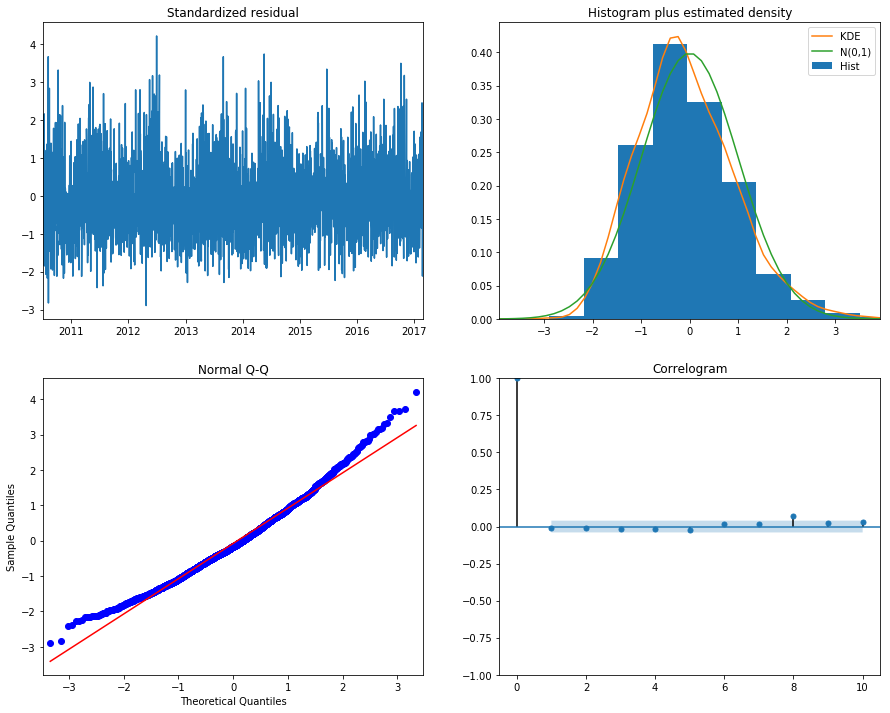

In [13]:
#So d = 0 and q = 0 actually outperformed d = 1 and q = 1. Now I would like to visualize these predictions and get some hard numbers to back them up
import matplotlib.pyplot as plt
%matplotlib inline
mod = sm.tsa.statespace.SARIMAX(y[17],
                                order=(5, 0, 0),
                                seasonal_order=(14, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()                                    
print(results.summary().tables[1])
#It is important to see the diagnostics of a time series to ensure we did not overlook any stationarity issues
results.plot_diagnostics(figsize=(15, 12))
plt.show()

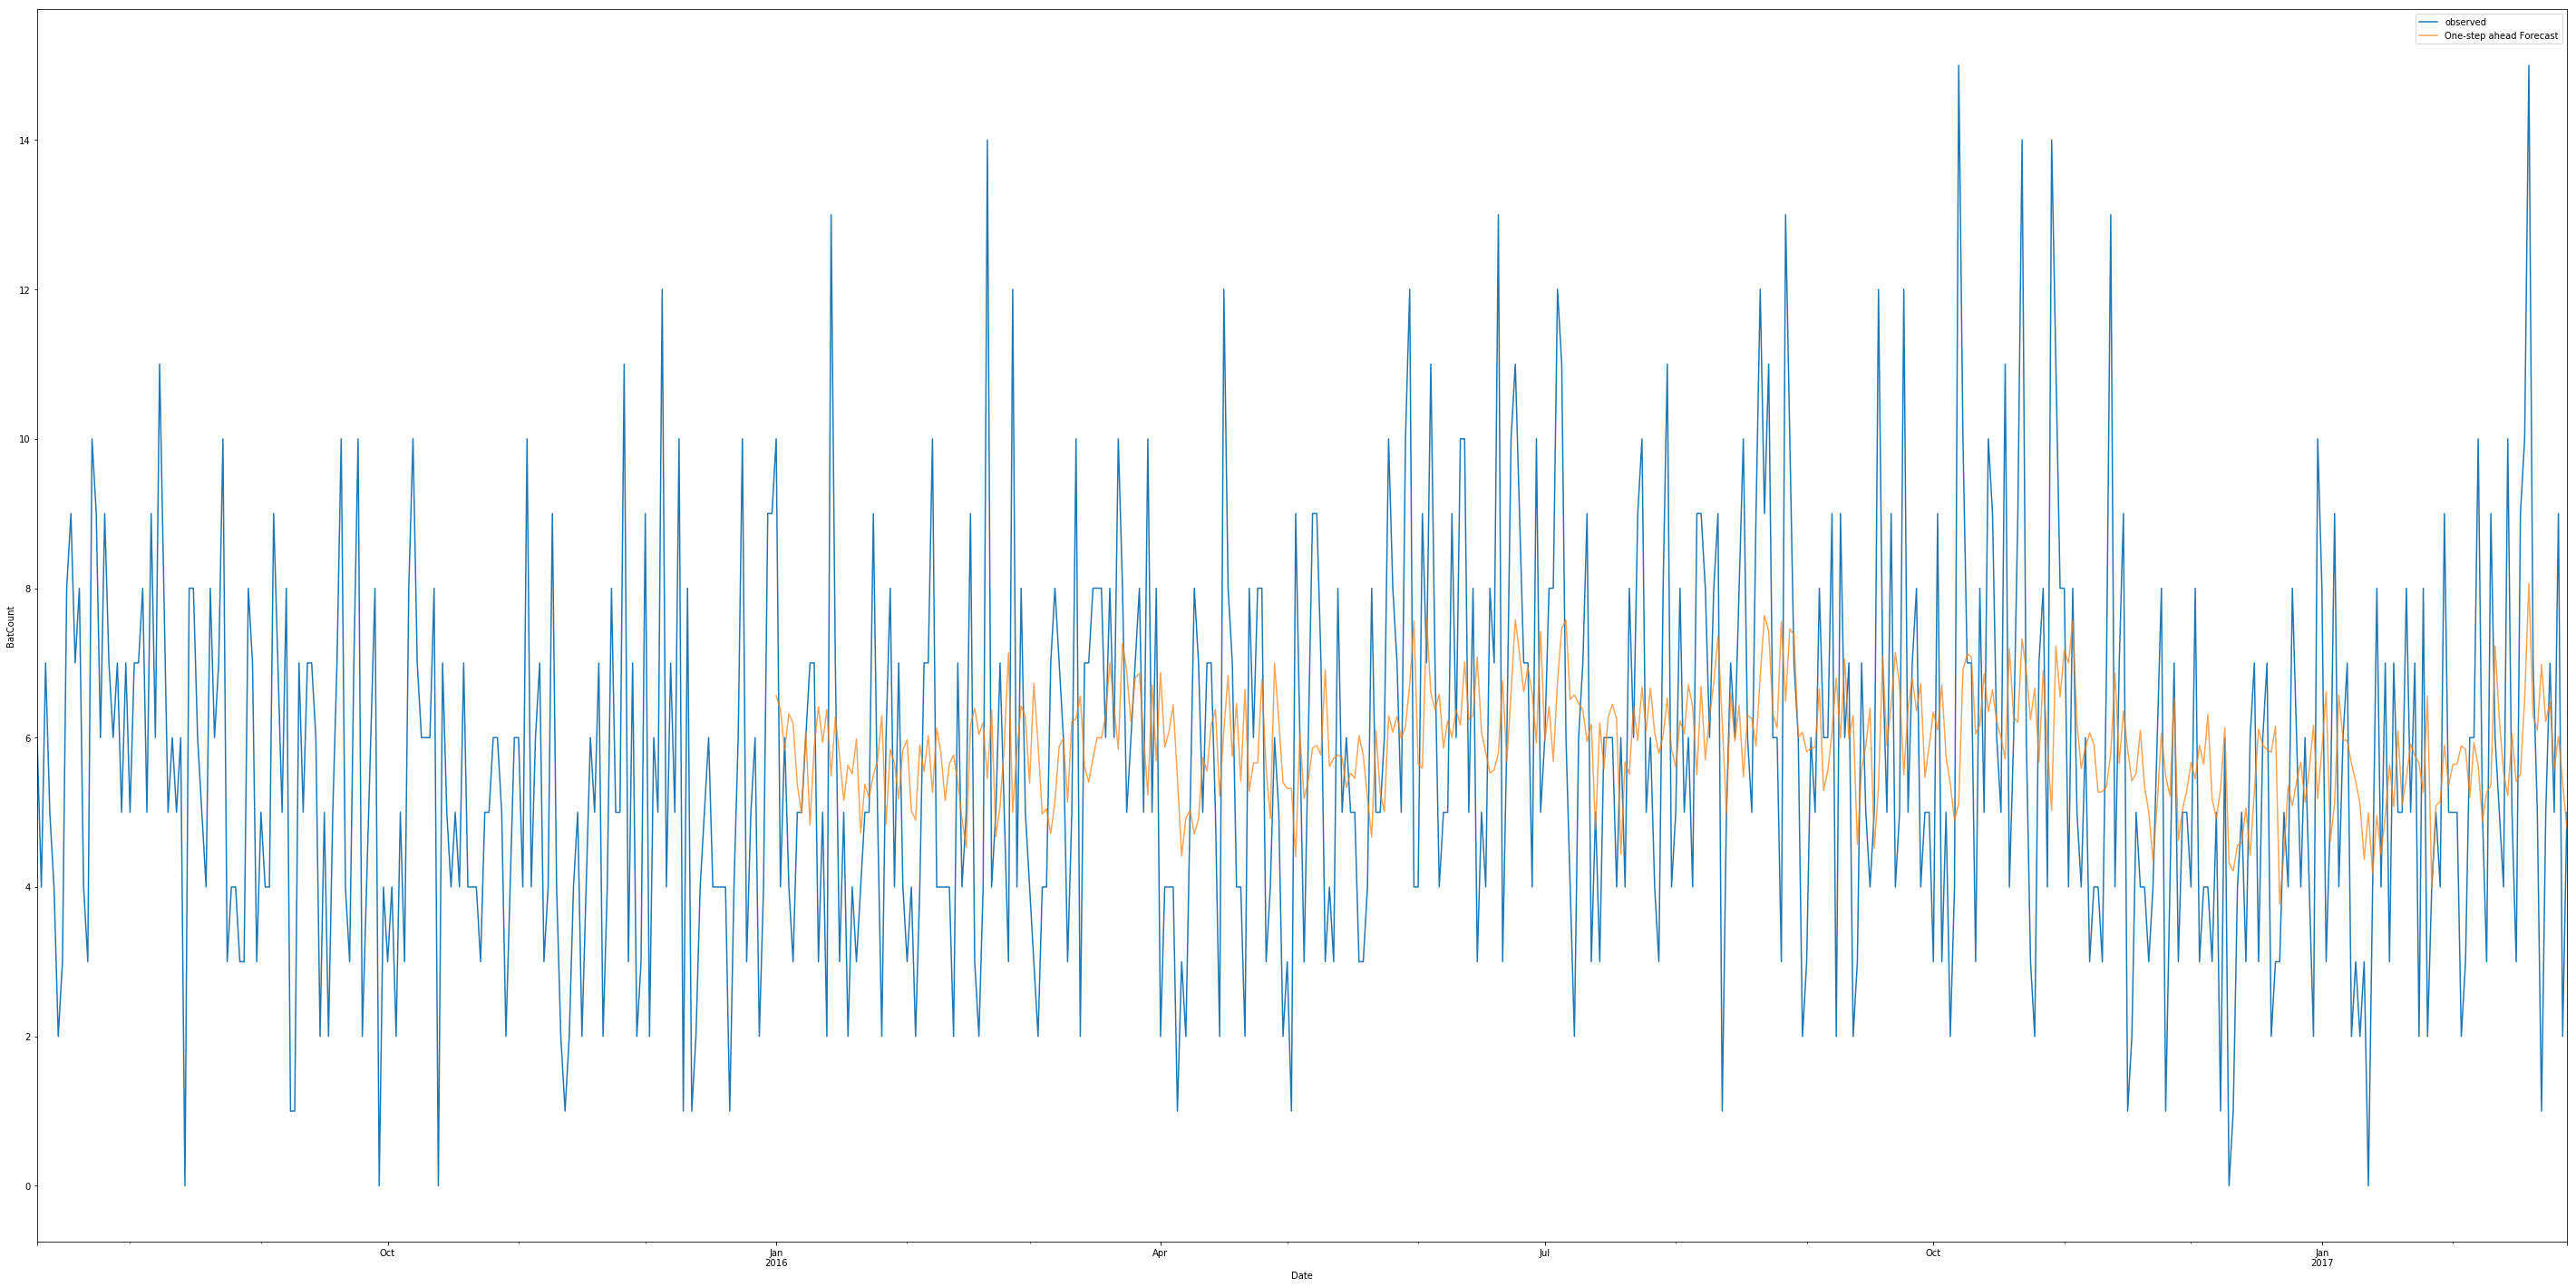

In [14]:
#It could be better. Ideally the upper right hand graph is normally distributed  but for the most part these graphs back up the stationarity of our data. Time for predictions
pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)

#We would like to see our predictions laid on top of our actual values and I am choosing to focus on the time period from Jan/2016 to Mar/2017
ax = y[17][2016:].plot(label='observed', figsize = (50, 25))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.set_xlabel('Date')
ax.set_ylabel('BatCount')
plt.legend()
plt.show()

We see some good and some bad in this graph. Our model appears to predict up and down trends fairly well but it fails to capture the magnitude of each tick. For example, our model estimates that the number of batteries always falls in the realm of 4 - 8 when in actuality we see a number of days with no batteries and others with as many as 15. The latter of these outliers are the ones that we have been trying to foretell so this model may not be the best option going forward.

In [15]:
y_forecasted = pred.predicted_mean
y_truth = y[17]['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 7.29


The MSE would support that conslusion so let's explore some classificaion models that predict on which days an innordinate number of batteries will occur. 

# Data Transformation: Round Two

In [18]:
#Let's replicate the framework we used to organize batteries for thefts, narcotics and criminal damages offenses
df_crimdams = pd.read_csv('crimdams_date_ward.csv')
df_thefts = pd.read_csv('thefts_date_ward.csv')
df_narcotics = pd.read_csv('narcotics_date_ward.csv')

#Minor adjustment to be made
def datetime_indexer(dataframe):
    dataframe['Date'] = dataframe['Unnamed: 0'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d'))
    dataframe.drop('Unnamed: 0', axis = 1, inplace = True)
    dataframe.set_index('Date', inplace = True)

datetime_indexer(df_crimdams)
datetime_indexer(df_thefts)
datetime_indexer(df_narcotics)

So if we were predicting crime in real time, the information that we would have in hand would have come from one day in the past (or two or three days...) so we should lag our features by (at least) one day before moving forward to make this project as realistic as possible.

In [19]:
def lag_func(dataframe):
    #We are dropping the first value in each dataframe because it will be a null value after shifting
    return dataframe.shift(1)[1:]

df_bats = lag_func(df_bats)
df_crimdams = lag_func(df_crimdams)
df_thefts = lag_func(df_thefts)
df_narcotics = lag_func(df_narcotics)
df_weather = lag_func(df_weather)

In [20]:
#We would also like to have more precise column names because I will be making pipelines in the coming steps
df_bats.columns = [('Ward %s Batteries' % col) for col in df_bats.columns]
df_crimdams.columns = [('Ward %s CrimDamages' % col) for col in df_crimdams.columns]
df_thefts.columns = [('Ward %s Thefts' % col) for col in df_thefts.columns]
df_narcotics.columns = [('Ward %s Narcotics' % col) for col in df_narcotics.columns]

In [21]:
#We also want to include some constants like day of week, month of year, etc.
df_daterange = pd.DataFrame(pd.date_range(start='2010-01-02', end='2017-02-28', freq='D'), columns = ['Date'])

In [22]:
def date_pulls(dataframe):
    dataframe['Weekday'] = dataframe['Date'].apply(lambda x: x.weekday())
    dataframe['Month'] = dataframe['Date'].apply(lambda x: x.month)
    dataframe['Year'] = dataframe['Date'].apply(lambda x: x.year)
date_pulls(df_daterange)

In [28]:
#Now we should bring all of these dataframes into one agglomerative dataframe before pipelining
df_whole = pd.concat([df_bats, df_crimdams, df_thefts, df_narcotics, df_weather, df_daterange], axis = 1)

In [26]:
#In order to conduct experiments efficiently, we will assembly pipelines here
from sklearn.base import TransformerMixin
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

#Pulls the column that we want from dataframes when making pipelines
class FeatureExtractor(TransformerMixin):
    def __init__(self, column):
        self.column = column
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x, y=None):
        return x[self.column].values.reshape(-1, 1)
    
#The below examples specify that we are pipelining Ward 28 but this code is generalizable for all Wards
bats_pipe = make_pipeline(
	FeatureExtractor('Ward 28.0 Batteries'))

crimdam_pipe = make_pipeline(
	FeatureExtractor('Ward 28.0 CrimDamages'))

thefts_pipe = make_pipeline(
	FeatureExtractor('Ward 28.0 Thefts'))

nar_pipe = make_pipeline(
	FeatureExtractor('Ward 28.0 Narcotics'))

#These are our weather and datetime pipelines
max_temp_pipe = make_pipeline(
	FeatureExtractor('MaxTemp'),
    MinMaxScaler((0,100)))

humid_pipe = make_pipeline(
	FeatureExtractor('Humidity'))

bar_pipe = make_pipeline(
	FeatureExtractor('BarPress'))

weekday_pipe = make_pipeline(
	FeatureExtractor('Weekday'), 
	LabelBinarizer())

month_pipe = make_pipeline(
	FeatureExtractor('Month'),
	LabelBinarizer())

year_pipe = make_pipeline(
	FeatureExtractor('Year'),
	LabelBinarizer())

#This code lays the foundation for a union of pipelines that brings together everything that we have transformed thus far
union = make_union(
	max_temp_pipe, bats_pipe, crimdam_pipe, thefts_pipe, nar_pipe, humid_pipe, bar_pipe, weekday_pipe, month_pipe, year_pipe)

In [30]:
x = union.fit_transform(df_whole)

In [31]:
#And if the reader recalls, we already defined y and now we are going to operationalize it in a way that it can alert us of a particularly dangerous day
y[28].describe()

count    2616.000000
mean        7.957187
std         3.391317
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        28.000000
Name: 28, dtype: float64

In [ ]:
#So roughly 75% of the days analyzed here have seen 10 or fewer 